In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [18]:
flights = pd.read_csv('/Users/simarmalhan/Downloads/Customer Flight Activity.csv')

In [19]:
loyalty = pd.read_csv('/Users/simarmalhan/Downloads/Customer Loyalty History.csv')

In [20]:
flights.head()

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

In [21]:
loyalty.head()

Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Star  3842.79        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year  Cancellation Month  
0             2016                 2                NaN                 NaN  
1             2016                 3                NaN                 NaN  
2             2014                 7             2018.0                 1.0  
3             2013                 2                NaN                 NaN  
4             2014                10                NaN                 NaN

In [26]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [27]:
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

## Preprocessing

In [28]:
flights = flights.drop(['Year', 'Month'], axis = 1) # dropping unneccessary columns

In [30]:
customer = flights.groupby('Loyalty Number', as_index = False).sum()

In [31]:
customer

Loyalty Number  Flights Booked  Flights with Companions  Total Flights  \
0              100018             157                       35            192   
1              100102             173                       42            215   
2              100140             152                       38            190   
3              100214              79                       17             96   
4              100272             127                       36            163   
...               ...             ...                      ...            ...   
16732          999902             178                       47            225   
16733          999911               0                        0              0   
16734          999940              63                       23             86   
16735          999982              22                        2             24   
16736          999986             121                       17            138   

       Distance  Points Accumulated  Points Redeemed  \
0         50682             5376.00             1513   
1         40222             4115.25             1195   
2         41252             4184.25              593   
3         33982             3426.00              861   
4         40872             4108.04             1007   
...         ...                 ...              ...   
16732     57227             6056.50              876   
16733         0                0.00                0   
16734     23410             2415.00              672   
16735      5948              594.00                0   
16736     32937             3418.00             1726   

       Dollar Cost Points Redeemed  
0                              123  
1                               96  
2                               48  
3                               70  
4                               82  
...                            ...  
16732                           71  
16733                            0  
16734                           54  
16735                            0  
16736                          140  

[16737 rows x 8 columns]

In [32]:
final = pd.merge(loyalty, customer, on = 'Loyalty Number', how = 'inner')

In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               16737 non-null  int64  
 1   Country                      16737 non-null  object 
 2   Province                     16737 non-null  object 
 3   City                         16737 non-null  object 
 4   Postal Code                  16737 non-null  object 
 5   Gender                       16737 non-null  object 
 6   Education                    16737 non-null  object 
 7   Salary                       12499 non-null  float64
 8   Marital Status               16737 non-null  object 
 9   Loyalty Card                 16737 non-null  object 
 10  CLV                          16737 non-null  float64
 11  Enrollment Type              16737 non-null  object 
 12  Enrollment Year              16737 non-null  int64  
 13  Enrollment Month

In [34]:
final.isna().sum()

Loyalty Number                     0
Country                            0
Province                           0
City                               0
Postal Code                        0
Gender                             0
Education                          0
Salary                          4238
Marital Status                     0
Loyalty Card                       0
CLV                                0
Enrollment Type                    0
Enrollment Year                    0
Enrollment Month                   0
Cancellation Year              14670
Cancellation Month             14670
Flights Booked                     0
Flights with Companions            0
Total Flights                      0
Distance                           0
Points Accumulated                 0
Points Redeemed                    0
Dollar Cost Points Redeemed        0
dtype: int64

In [35]:
final.nunique()

Loyalty Number                 16737
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
Flights Booked                   268
Flights with Companions           92
Total Flights                    328
Distance                       12714
Points Accumulated             12081
Points Redeemed                 2329
Dollar Cost Points Redeemed      283
dtype: int64

In [36]:
import plotly.express as px

In [37]:
final_encoded = pd.get_dummies(final, columns = ['Gender', 'Loyalty Card'])
final_encoded

Loyalty Number Country          Province        City Postal Code  \
0              480934  Canada           Ontario     Toronto     M2Z 4K1   
1              549612  Canada           Alberta    Edmonton     T3G 6Y6   
2              429460  Canada  British Columbia   Vancouver     V6E 3D9   
3              608370  Canada           Ontario     Toronto     P1W 1K4   
4              530508  Canada            Quebec        Hull     J8Y 3Z5   
...               ...     ...               ...         ...         ...   
16732          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
16733          680886  Canada      Saskatchewan      Regina     S1J 3C5   
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

      Education    Salary Marital Status       CLV Enrollment Type  ...  \
0      Bachelor   83236.0        Married   3839.14        Standard  ...   
1       College       NaN       Divorced   3839.61        Standard  ...   
2       College       NaN         Single   3839.75        Standard  ...   
3       College       NaN         Single   3839.75        Standard  ...   
4      Bachelor  103495.0        Married   3842.79        Standard  ...   
...         ...       ...            ...       ...             ...  ...   
16732   College       NaN        Married  61850.19        Standard  ...   
16733  Bachelor   89210.0        Married  67907.27        Standard  ...   
16734   College       NaN         Single  74228.52        Standard  ...   
16735  Bachelor  -57297.0        Married  10018.66  2018 Promotion  ...   
16736  Bachelor   75049.0        Married  83325.38        Standard  ...   

       Total Flights  Distance  Points Accumulated  Points Redeemed  \
0                171     51877             5224.44             1418   
1                215     41578             4176.04             1971   
2                 87     19664             1963.00              374   
3                159     36043             3626.68             1291   
4                176     36840             3689.68                0   
...              ...       ...                 ...              ...   
16732            139     40743             4070.00                0   
16733            243     43420             4348.76             1645   
16734            207     49113             4925.56             1529   
16735            154     41381             4166.44                0   
16736              0         0                0.00                0   

       Dollar Cost Points Redeemed  Gender_Female  Gender_Male  \
0                              115           True        False   
1                              159          False         True   
2                               30          False         True   
3                              105          False         True   
4                                0          False         True   
...                            ...            ...          ...   
16732                            0           True        False   
16733                          132           True        False   
16734                          124          False         True   
16735                            0          False         True   
16736                            0           True        False   

       Loyalty Card_Aurora  Loyalty Card_Nova  Loyalty Card_Star  
0                    False              False               True  
1                    False              False               True  
2                    False              False               True  
3                    False              False               True  
4                    False              False               True  
...                    ...                ...                ...  
16732                False              False               True  
16733                Fa

## Creating a pairplot

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


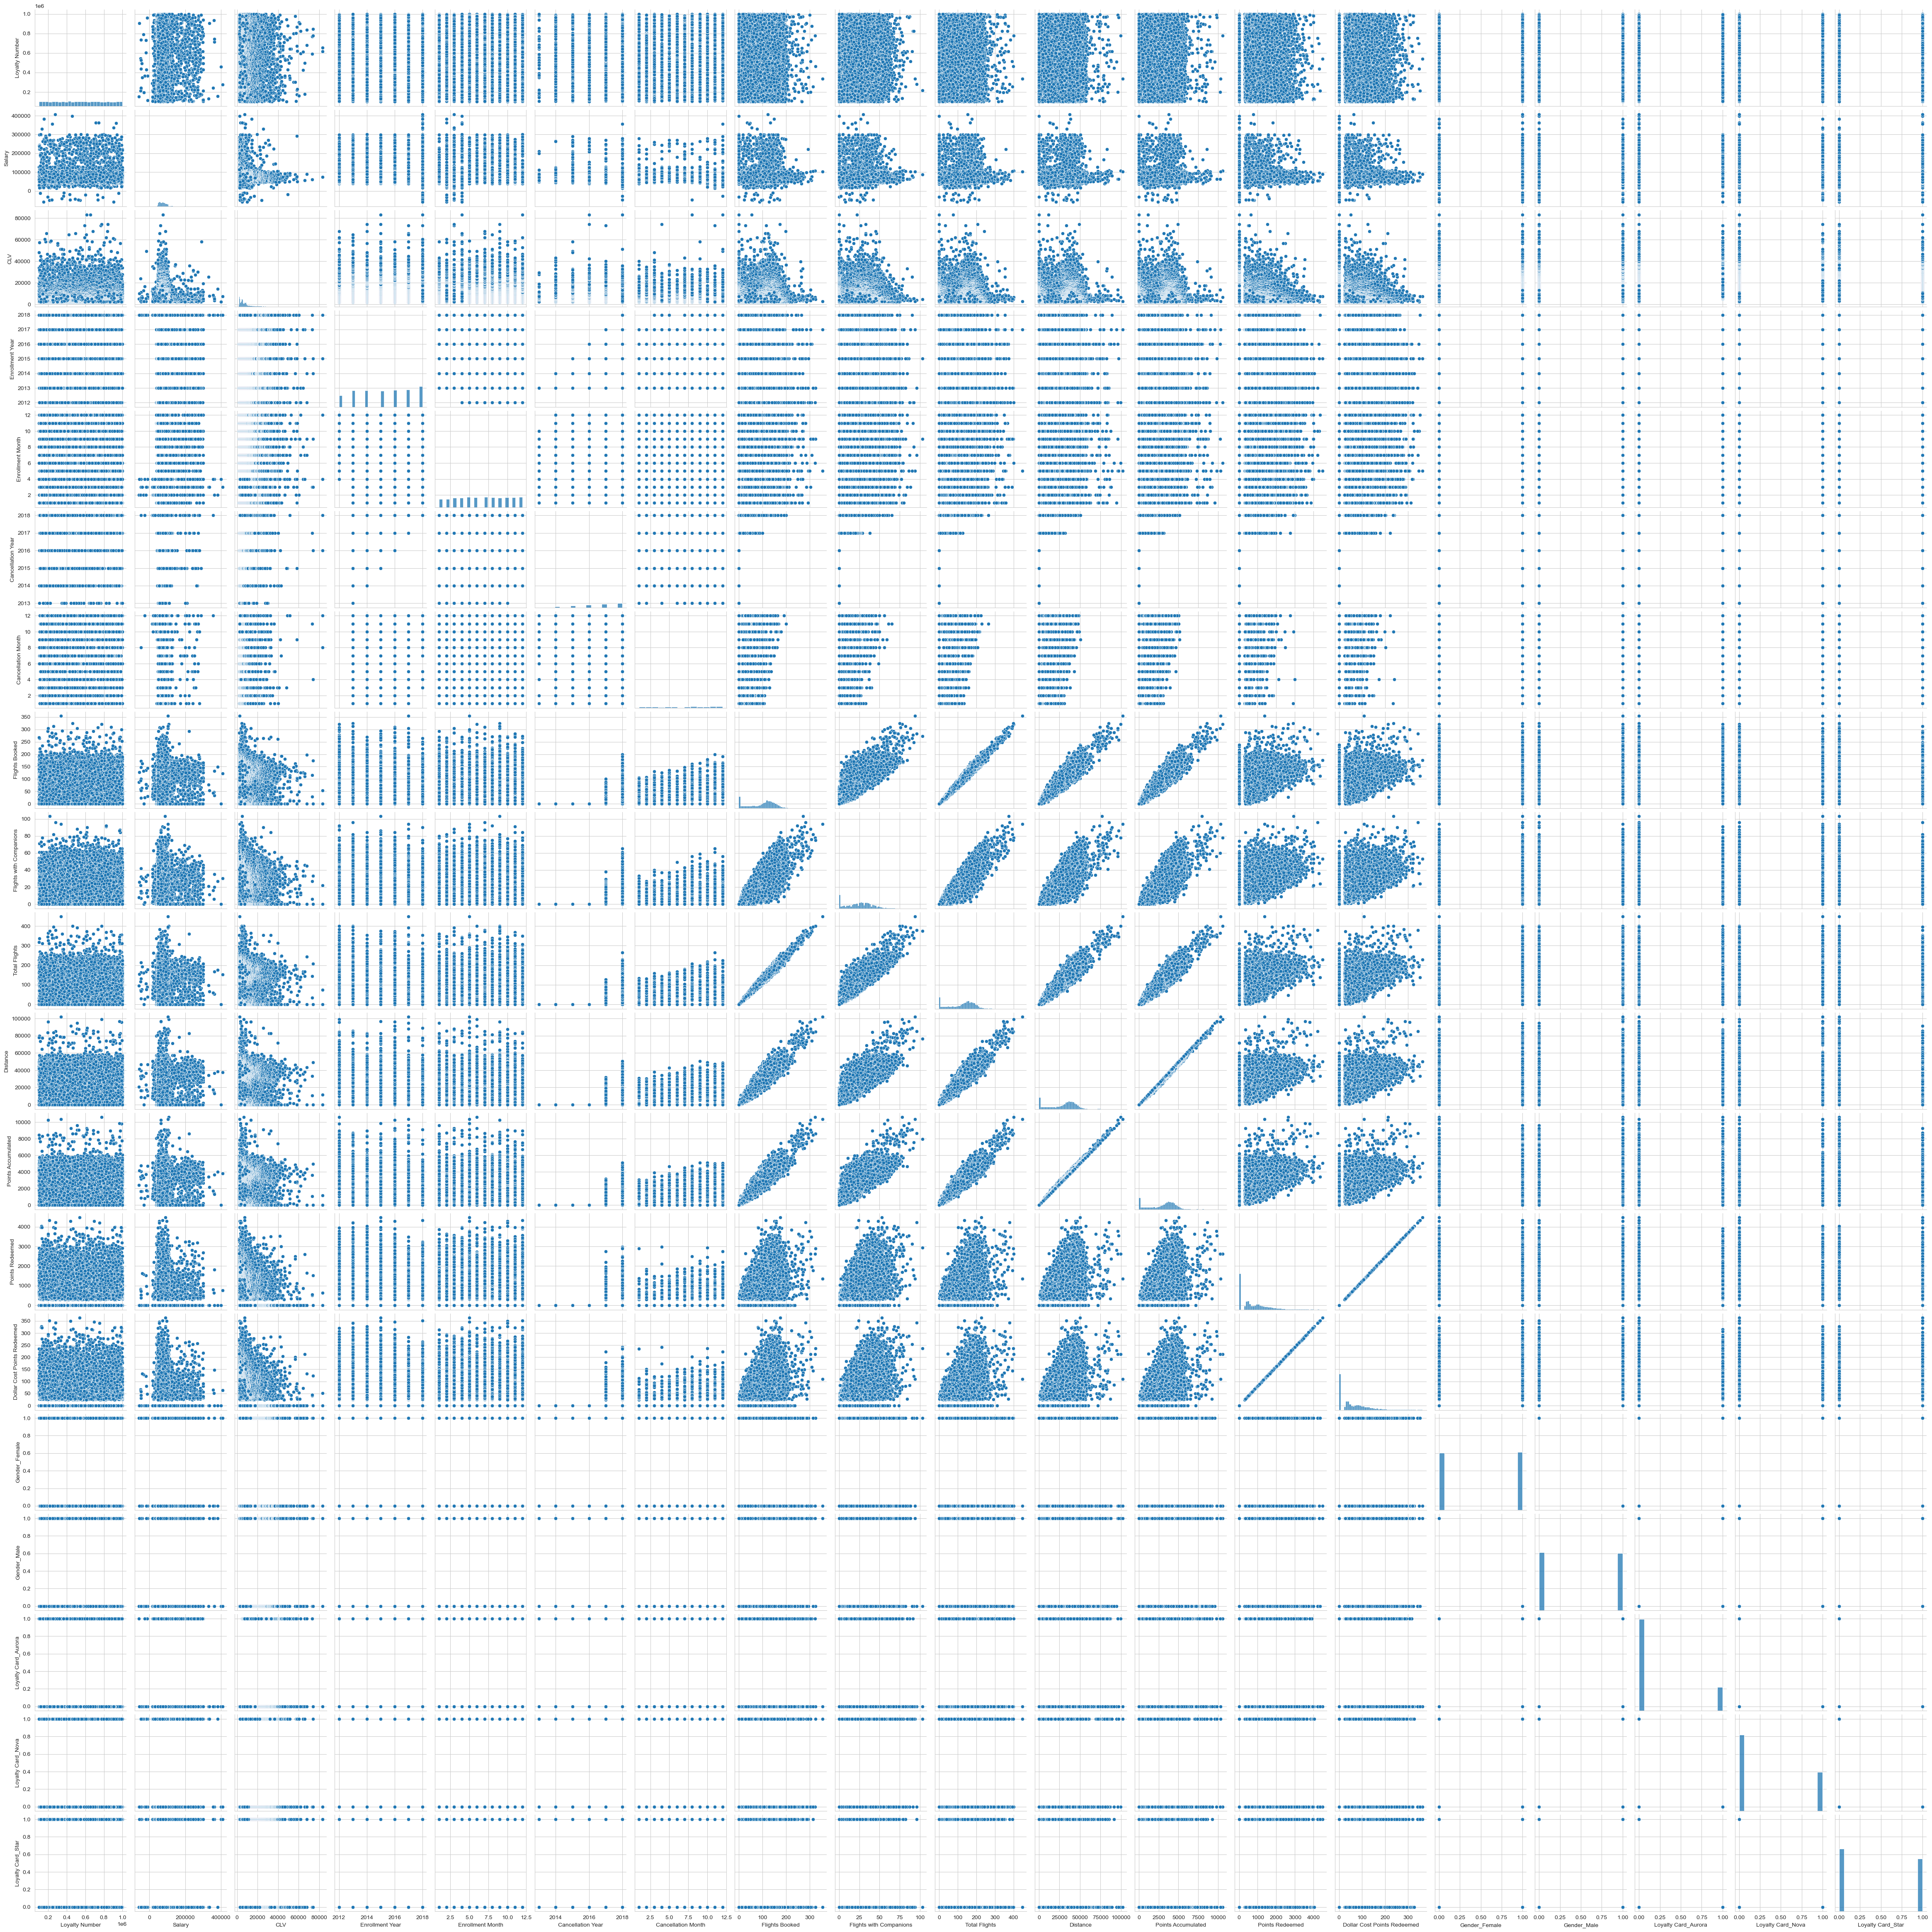

In [38]:
sns.pairplot(final_encoded)

In [44]:
num = final_encoded.select_dtypes(include = ['int64', 'float64', 'boolean']).columns

<Axes: >

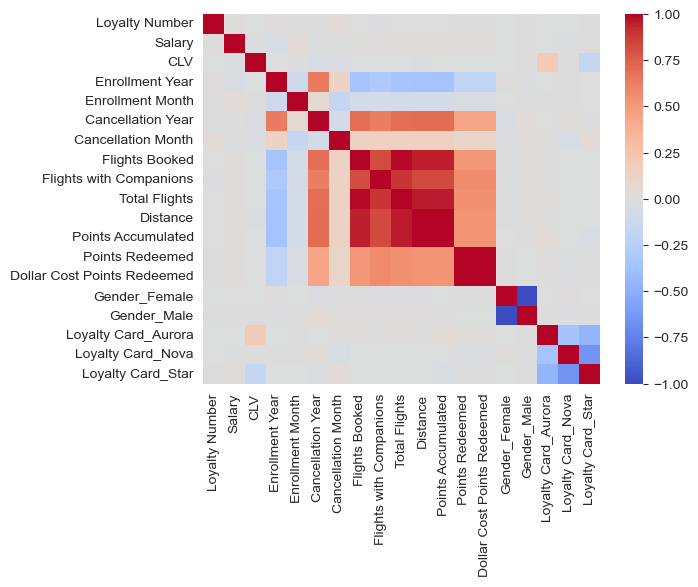

In [45]:
correlation_matrix = final_encoded[num].corr()
sns.heatmap(correlation_matrix, cmap = 'coolwarm')

*Let's remove the country, dollar cost points redeemed, province columns as we wouldn't need them*

In [46]:
final = final.drop(['Country', 'Dollar Cost Points Redeemed', 'Province'], axis = 1)

In [47]:
final['Cancelled'] = final['Cancellation Year'].notna().astype(int)
final = final.drop(['Cancellation Month', 'Enrollment Month'], axis = 1)
final

Loyalty Number        City Postal Code  Gender Education    Salary  \
0              480934     Toronto     M2Z 4K1  Female  Bachelor   83236.0   
1              549612    Edmonton     T3G 6Y6    Male   College       NaN   
2              429460   Vancouver     V6E 3D9    Male   College       NaN   
3              608370     Toronto     P1W 1K4    Male   College       NaN   
4              530508        Hull     J8Y 3Z5    Male  Bachelor  103495.0   
...               ...         ...         ...     ...       ...       ...   
16732          823768   Vancouver     V6E 3Z3  Female   College       NaN   
16733          680886      Regina     S1J 3C5  Female  Bachelor   89210.0   
16734          776187   Vancouver     V5R 1W3    Male   College       NaN   
16735          906428  Whitehorse     Y2K 6R0    Male  Bachelor  -57297.0   
16736          652627    Winnipeg     R2C 0M5  Female  Bachelor   75049.0   

      Marital Status Loyalty Card       CLV Enrollment Type  Enrollment Year  \
0            Married         Star   3839.14        Standard             2016   
1           Divorced         Star   3839.61        Standard             2016   
2             Single         Star   3839.75        Standard             2014   
3             Single         Star   3839.75        Standard             2013   
4            Married         Star   3842.79        Standard             2014   
...              ...          ...       ...             ...              ...   
16732        Married         Star  61850.19        Standard             2012   
16733        Married         Star  67907.27        Standard             2014   
16734         Single         Star  74228.52        Standard             2014   
16735        Married         Star  10018.66  2018 Promotion             2018   
16736        Married         Star  83325.38        Standard             2015   

       Cancellation Year  Flights Booked  Flights with Companions  \
0                    NaN             132                       39   
1                    NaN             190                       25   
2                 2018.0              66                       21   
3                    NaN             123                       36   
4                    NaN             132                       44   
...                  ...             ...                      ...   
16732                NaN             126                       13   
16733                NaN             198                       45   
16734                NaN             174                       33   
16735                NaN             128                       26   
16736             2016.0               0                        0   

       Total Flights  Distance  Points Accumulated  Points Redeemed  Cancelled  
0                171     51877             5224.44             1418          0  
1                215     41578             4176.04             1971          0  
2                 87     19664             1963.00              374          1  
3                159     36043             3626.68             1291          0  
4                176     36840             3689.68                0          0  
...              ...       ...                 ...              ...        ...  
16732            139     40743             4070.00                0          0  
16733            243     43420             4348.76             1645          0  
16734            207     49113             4925.56             1529          0  
16735            154     41381             4166.44                0          0  
16736              0         0                0.00                0          1  

[16737 rows x 19 columns]

# Analysis and Visualiation

In [49]:
px.scatter(final, x = 'Points Accumulated', y = 'Points Redeemed', size = 'Flights Booked')

*More the points accumulated, more flights are booked. Additionally, despite what logic dictates, it is not clear whether more accumulation results into higher redemption of points*

## CLV vs Loyalty Card

In [53]:
px.histogram(final, x = 'Loyalty Card', y = 'CLV', color = 'Loyalty Card')

## Flights booked per city

In [64]:
flightsbookedbycity = final.groupby(['City'], as_index = False)['Flights Booked'].sum().sort_values(by = 'Flights Booked', ascending = False)
flightsbookedbycity

City  Flights Booked
20         Toronto          338427
23       Vancouver          255992
12        Montreal          202967
28        Winnipeg           64187
26        Whistler           58528
6          Halifax           52093
13          Ottawa           51730
4         Edmonton           50128
22         Trenton           47286
15     Quebec City           46656
5      Fredericton           44706
3     Dawson Creek           44060
16          Regina           40435
24        Victoria           39506
21       Tremblant           39439
9         Kingston           39139
7             Hull           35491
25  West Vancouver           33368
19     Thunder Bay           25557
17      St. John's           24822
11         Moncton           21412
18         Sudbury           21203
1          Calgary           19635
10          London           16796
0            Banff           16323
14     Peace River           11993
27      Whitehorse           11962
8          Kelowna            9072
2    Charlottetown            6251

In [66]:
px.line(flightsbookedbycity, x = 'City', y = 'Flights Booked', markers = True)

In [67]:
counts_enrollment = final.groupby(['Enrollment Year'], as_index = False)['Loyalty Number'].count()
counts_enrollment

Enrollment Year  Loyalty Number
0             2012            1686
1             2013            2397
2             2014            2370
3             2015            2331
4             2016            2456
5             2017            2487
6             2018            3010

In [68]:
counts_cancellations = final.groupby(['Cancellation Year'], as_index = False)['Loyalty Number'].count()
counts_cancellations

Cancellation Year  Loyalty Number
0             2013.0              43
1             2014.0             181
2             2015.0             265
3             2016.0             427
4             2017.0             506
5             2018.0             645